# Numerical tests

In [1]:
import numpy as np
from scipy.linalg import eig, inv, cholesky
from OU_simulation import *
from Policy_Gradient_agent import *
from TD3 import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.integrate import odeint
%reload_ext autoreload
%autoreload 2

#### 1 Learning graph results

In [2]:
import pickle
from QR_DQN import RQ_DQN_train
from MDQN   import MDQN_train
from TD3    import TD3_train

timesteps = 200000

N = 1       # assets
L = 1000    # timesteps 
T = 40      # final time T

r = 0.0
p  = np.ones((N,1)) #simplification in this model the asset prices themselves are assumed to be mean reverting
tc = 0.01

process = OU_process_shuffler(N,T,L)
env = TradingEnvironment(process,T,r,p,mode='portfolio', max_pi=1, max_change=1,initial_wealth=0, transaction_costs=tc)

perf_RQ_DQN = list()
perf_MDQN = list()
perf_TD3 = list()

for test in range(5):
    print(test)
    agent_RQ_DQN, history_RQ_DQN = RQ_DQN_train(env, timesteps)
    agent_MDQN, history_MDQN = MDQN_train(env,timesteps)
    agent_TD3, history_TD3 = TD3_train(env, timesteps)
    
    perf_RQ_DQN.append(history_RQ_DQN)
    perf_MDQN.append(history_MDQN)
    perf_TD3.append(history_TD3)

    dbfile = open('RQ_DQN', 'wb')
    # source, destination
    pickle.dump(perf_RQ_DQN, dbfile)                    
    dbfile.close()

    dbfile = open('MDQN', 'wb')
    # source, destination
    pickle.dump(perf_MDQN, dbfile)                    
    dbfile.close()

    dbfile = open('TD3', 'wb')
    # source, destination
    pickle.dump(perf_TD3, dbfile)                    
    dbfile.close()

0
Using  cpu


/opt/anaconda3/envs/deep_learning/lib/python3.8/site-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


Episode 100	Frame 99900	Average Score: 0.622
Episode 200	Frame 199800	Average Score: 0.844
Using  cpu
Episode 100	Frame 99900	Average Score: 1.755
Episode 200	Frame 199800	Average Score: 2.277
cpu
Episode 100	Frame 99994	Average Score: 1.844
Episode 200	Frame 199994	Average Score: 1.800
1
Using  cpu
Episode 100	Frame 99900	Average Score: 0.444
Episode 200	Frame 199800	Average Score: 1.744
Using  cpu
Episode 100	Frame 99900	Average Score: 0.722
Episode 200	Frame 199800	Average Score: 1.688
cpu
Episode 100	Frame 99994	Average Score: 2.022
Episode 200	Frame 199994	Average Score: 2.111
2
Using  cpu
Episode 100	Frame 99900	Average Score: 0.266
Episode 200	Frame 199800	Average Score: 1.222
Using  cpu
Episode 100	Frame 99900	Average Score: 0.877
Episode 200	Frame 199800	Average Score: 1.655
cpu
Episode 100	Frame 99994	Average Score: 1.833
Episode 200	Frame 199994	Average Score: 1.922
3
Using  cpu
Episode 100	Frame 99900	Average Score: -0.911
Episode 200	Frame 199800	Average Score: -0.366
Usin

In [2]:
import pickle
with open("TD3", "rb") as input_file:
  perf_TD3 = pickle.load(input_file)

with open("RQ_DQN", "rb") as input_file:
  perf_RQ_DQN = pickle.load(input_file)

with open("MDQN", "rb") as input_file:
  perf_MDQN = pickle.load(input_file)

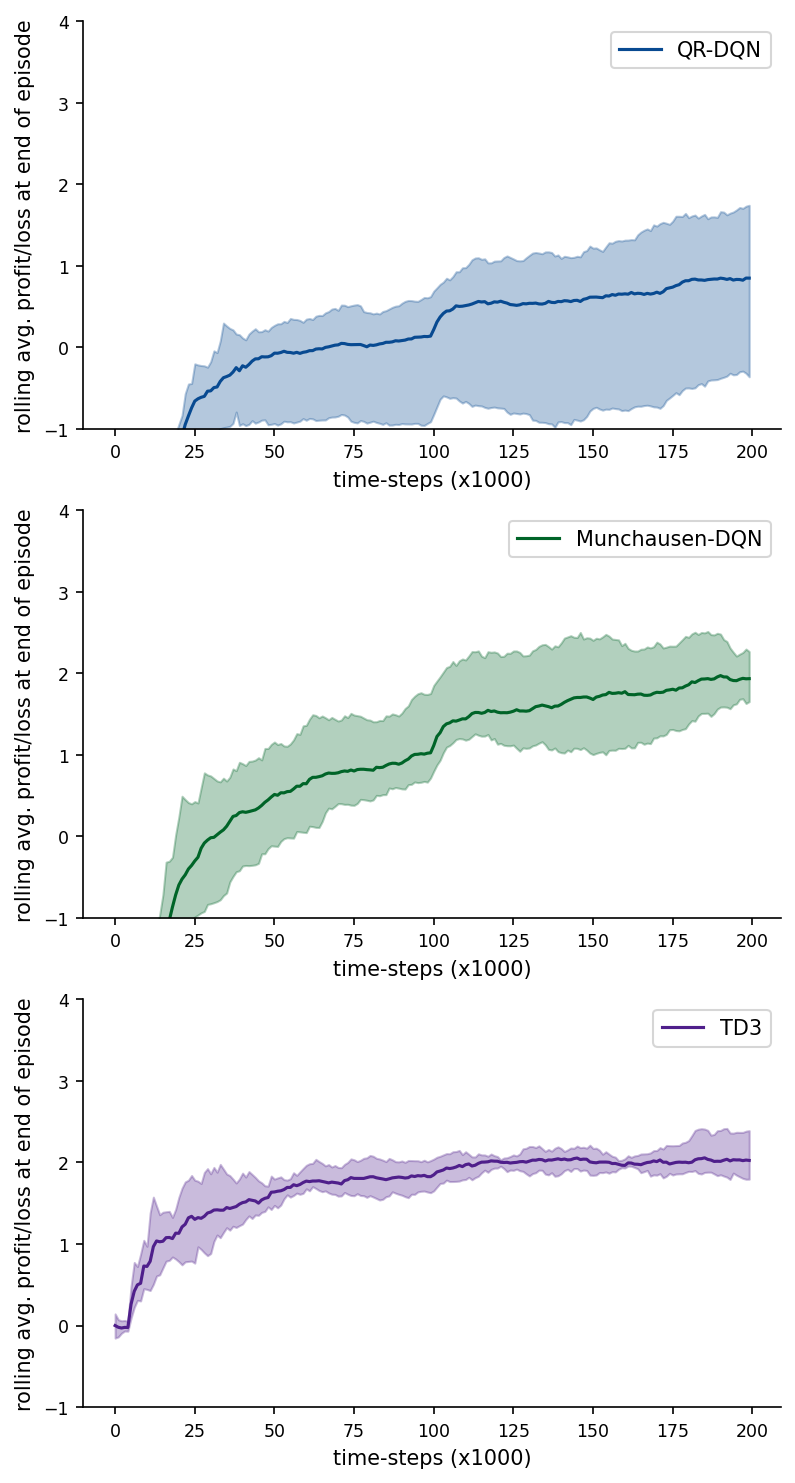

In [4]:
import matplotlib.pyplot as plt

res_TD3 = np.array(perf_TD3)
res_RQDQM = np.array(perf_RQ_DQN)
res_MDQM = np.array(perf_MDQN)


fig, ax = plt.subplots(3,1,figsize=(6,12),dpi=150)

clr = plt.cm.Purples(0.9)
#ax[0].set_facecolor(plt.cm.Blues(.2))
#ax[0].set_title('RL-model performane, no market frictions', fontsize = 14, fontweight = 'bold')

#x = df.columns
x   = np.arange(0,200)
y_l = res_TD3.min(axis=0)
y_m = res_TD3.mean(axis=0)
y_u = res_TD3.max(axis=0)

ax[2].plot(y_m, label = 'Median', color = clr)
ax[2].legend(["TD3"])
ax[2].fill_between(x, y_l, y_u, alpha=0.3, edgecolor=clr, facecolor=clr)
ax[2].set_ylabel('rolling avg. profit/loss at end of episode', fontsize = 'medium')
ax[2].set_xlabel('time-steps (x1000)', fontsize = 'medium')
ax[2].set_ylim([-1,4])
ax[2].tick_params(axis='both', labelsize='small')
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)

x   = np.arange(0,200)
y_l = res_RQDQM.min(axis=0)
y_m = res_RQDQM.mean(axis=0)
y_u = res_RQDQM.max(axis=0)

clr = plt.cm.Blues(0.9)
ax[0].plot(y_m, label = 'Median', color = clr)
ax[0].legend(["QR-DQN"])
ax[0].fill_between(x, y_l, y_u, alpha=0.3, edgecolor=clr, facecolor=clr)
ax[0].set_ylabel('rolling avg. profit/loss at end of episode', fontsize = 'medium')
ax[0].set_xlabel('time-steps (x1000)', fontsize = 'medium')
ax[0].tick_params(axis='both', labelsize='small')
ax[0].set_ylim([-1,4])
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

x   = np.arange(0,200)
y_l = res_MDQM.min(axis=0)
y_m = res_MDQM.mean(axis=0)
y_u = res_MDQM.max(axis=0)

clr = plt.cm.Greens(0.9)
ax[1].plot(y_m, label = 'Median', color = clr)
ax[1].legend(["Munchausen-DQN"])
ax[1].fill_between(x, y_l, y_u, alpha=0.3, edgecolor=clr, facecolor=clr)
ax[1].set_ylabel('rolling avg. profit/loss at end of episode', fontsize = 'medium')
ax[1].set_xlabel('time-steps (x1000)', fontsize = 'medium')
ax[1].tick_params(axis='both', labelsize='small')
ax[1].set_ylim([-1,4])
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

In [5]:
res_TD3.mean(axis=0)[-1]

2.0253918964426147

In [6]:
res_MDQM.mean(axis=0)[-1]

1.9345975578839245

In [8]:
res_RQDQM.min(axis=0)[-1]

-0.3630208581851825

In [ ]:
plt.hist()